In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
#suffix = 'VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v11'
suffix = 'VR_SSSF_HEMvetos_good_vtx_v10_m0p99_PV'

In [3]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [6]:
# sig_histo / bkg_histo is a dictionary of variables
print(bkg_histo.keys())

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_e1_dxy_fromPV', 'sel_e2_dxy_fromPV', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_mass_refit', 'sel_vtx_mass_low_refit', 'sel_vtx_pt_refit', 'sel_vtx_eta_refit', 'sel_vtx_phi_refit', 'sel_vtx_dR_refit', 'sel_vtx_mass_refit_vs_sel_vtx_mass', 'sel_vtx_mass_low_refit_vs_sel_

## Background

In [7]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx SSSF
DY-M50,0.00039399,0.00002111,0.00002111,0.00002111,0.00002111,0.00001118,0.00001073,0.00001070,0.00001049,0.00000644,0.00000138
QCD,0.00000248,0.00000005,0.00000005,0.00000005,0.00000005,0.00000002,0.00000002,0.00000002,0.00000002,0.00000000,0.00000000
Multiboson,0.00065914,0.00002850,0.00002850,0.00002850,0.00002850,0.00001482,0.00001418,0.00001385,0.00001353,0.00000936,0.00000289
TTX,0.00138336,0.00014506,0.00014506,0.00014506,0.00014506,0.00004156,0.00003956,0.00003913,0.00003785,0.00001751,0.00000694
ZJets,0.00242166,0.00004134,0.00004134,0.00004134,0.00004134,0.00002452,0.00002319,0.00002282,0.00002260,0.00001579,0.00000751
WJets,0.00101329,0.00002792,0.00002792,0.00002792,0.00002792,0.00001597,0.00001525,0.00001514,0.00001500,0.00000985,0.00000484
ZGamma,0.00032470,0.00000974,0.00000974,0.00000974,0.00000974,0.00000617,0.00000629,0.00000610,0.00000571,0.00000417,0.00000123
TTbar,0.00044365,0.00004080,0.00004080,0.00004080,0.00004080,0.00001433,0.00001333,0.00001304,0.00001290,0.00000844,0.00000321
SingleTop,0.00023564,0.00001252,0.00001252,0.00001252,0.00001252,0.00000480,0.00000447,0.00000439,0.00000433,0.00000283,0.00000105
DY-M4to50,0.00002646,0.00000130,0.00000130,0.00000130,0.00000130,0.00000069,0.00000068,0.00000068,0.00000065,0.00000032,0.00000005


In [8]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_SSSF_HEMvetos_good_vtx_v10_m0p99_PV/Cutflow/Efficiency//Background_Efficiency.csv


In [9]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx SSSF
DY-M50,"5,356.00",286.99,286.99,286.99,286.99,151.97,145.89,145.40,142.53,87.55,18.82
QCD,"53,319.99","1,090.51","1,090.51","1,090.51","1,090.51",398.33,390.04,390.04,366.93,0.24,0.00
Multiboson,"4,593.86",198.66,198.66,198.66,198.66,103.30,98.85,96.55,94.30,65.25,20.16
TTX,440.91,46.24,46.24,46.24,46.24,13.25,12.61,12.47,12.06,5.58,2.21
ZJets,"63,747.43","1,088.30","1,088.30","1,088.30","1,088.30",645.47,610.37,600.63,594.94,415.64,197.66
WJets,"214,716.62","5,915.89","5,915.89","5,915.89","5,915.89","3,383.40","3,232.48","3,208.66","3,178.51","2,087.77","1,026.31"
ZGamma,"1,665.25",49.98,49.98,49.98,49.98,31.67,32.27,31.28,29.30,21.37,6.33
TTbar,"22,073.23","2,029.90","2,029.90","2,029.90","2,029.90",712.99,663.27,648.60,642.03,420.12,159.83
SingleTop,"3,665.01",194.80,194.80,194.80,194.80,74.65,69.52,68.27,67.35,44.00,16.36
DY-M4to50,463.63,22.78,22.78,22.78,22.78,12.10,11.90,11.90,11.31,5.66,0.85


In [10]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_SSSF_HEMvetos_good_vtx_v10_m0p99_PV/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [11]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx SSSF
DY-M50,272468,26037,26037,26037,26037,9048,8939,8935,8184,3406,581
QCD,31603,535,535,535,535,160,159,159,141,1,0
Multiboson,24553,1415,1415,1415,1415,721,688,661,630,412,121
TTX,141391,17834,17834,17834,17834,5190,4871,4663,4421,2723,1051
ZJets,729756,15827,15827,15827,15827,9144,8813,8776,8614,5100,2414
WJets,1171204,39491,39491,39491,39491,18510,18101,18046,17428,9041,4412
ZGamma,6511,239,239,239,239,126,118,116,112,69,20
TTbar,519733,49078,49078,49078,49078,17120,15870,15499,15336,9984,3689
SingleTop,46314,1718,1718,1718,1718,645,575,569,560,343,139
DY-M4to50,25923,1903,1903,1903,1903,910,895,895,815,311,49


In [12]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx SSSF
DY-M50,272468,26037,26037,26037,26037,9048,8939,8935,8184,3406,581
QCD,31603,535,535,535,535,160,159,159,141,1,0
Multiboson,24553,1415,1415,1415,1415,721,688,661,630,412,121
TTX,141391,17834,17834,17834,17834,5190,4871,4663,4421,2723,1051
ZJets,729756,15827,15827,15827,15827,9144,8813,8776,8614,5100,2414
WJets,1171204,39491,39491,39491,39491,18510,18101,18046,17428,9041,4412
ZGamma,6511,239,239,239,239,126,118,116,112,69,20
TTbar,519733,49078,49078,49078,49078,17120,15870,15499,15336,9984,3689
SingleTop,46314,1718,1718,1718,1718,645,575,569,560,343,139
DY-M4to50,25923,1903,1903,1903,1903,910,895,895,815,311,49


In [13]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/VR_SSSF_HEMvetos_good_vtx_v10_m0p99_PV/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [14]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 1448.54


In [15]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,DY-M50,QCD,Multiboson,TTX,ZJets,WJets,ZGamma,TTbar,SingleTop,DY-M4to50,Total
Weighted Counts,18.82,0.00,20.16,2.21,197.66,"1,026.31",6.33,159.83,16.36,0.85,"1,448.54"
Raw Counts,581.00,0.00,121.00,"1,051.00","2,414.00","4,412.00",20.00,"3,689.00",139.00,49.00,"12,476.00"


## Data

In [16]:
pd.options.display.float_format = '{:,.1f}'.format
data_cts_df = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
data_cts_df

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx SSSF
data_2018_Data_MET_UL18_MET_Run2018D,"364,387.0","9,166.0","9,166.0","9,166.0","9,166.0","3,718.0","3,273.0","3,243.0","3,194.0","1,883.0",836.0
data_2018_Data_MET_UL18_MET_Run2018C,"82,311.0","2,093.0","2,093.0","2,093.0","2,093.0",843.0,752.0,748.0,733.0,435.0,206.0
data_2018_Data_MET_UL18_MET_Run2018B,"63,815.0","1,875.0","1,875.0","1,875.0","1,875.0",719.0,613.0,609.0,596.0,363.0,172.0
data_2018_Data_MET_UL18_MET_Run2018A,"124,602.0","3,649.0","3,649.0","3,649.0","3,649.0","1,363.0","1,196.0","1,188.0","1,171.0",704.0,309.0
Total,"635,115.0","16,783.0","16,783.0","16,783.0","16,783.0","6,643.0","5,834.0","5,788.0","5,694.0","3,385.0","1,523.0"


In [17]:
pd.options.display.float_format = '{:,.1f}'.format

data_composition = pd.DataFrame(data_cts_df[data_cts_df.columns.values[-1]]).transpose()

data_composition = data_composition.rename(index={data_cts_df.columns.values[-1]: 'Data Yield'})
data_composition = data_composition.rename(columns={'data_2018_Data_MET_UL18_MET_Run2018C': 'Run2018C', \
                                                   'data_2018_Data_MET_UL18_MET_Run2018B': 'Run2018B', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018A': 'Run2018A', \
                                                    'data_2018_Data_MET_UL18_MET_Run2018D': 'Run2018D'
                                                   })

data_composition = data_composition.reindex(sorted(data_composition.columns), axis=1)

data_composition

,Run2018A,Run2018B,Run2018C,Run2018D,Total
Data Yield,309.0,172.0,206.0,836.0,"1,523.0"


In [18]:
# Data/background MC
data_yield = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']
mc_yield = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

data_yield / mc_yield

Preselections                                         1.7
n(good vertex) > 0                                    1.5
HEM Jet Veto (eta upper bound bug)                    1.5
HEM Jet Veto (additionally veto missing eta region)   1.5
HEM electron Veto                                     1.5
No b-tagged jets                                      1.2
Leading jet |eta| < 2.4                               1.1
Leading jet pT > 80 GeV                               1.1
dPhi(MET,leading jet) > 1.5                           1.1
dPhi(MET,all jets) > 0.75                             1.1
Vtx SSSF                                              1.1
Name: Total, dtype: float64

In [19]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                     16,783.0
HEM Jet Veto (eta upper bound bug)                     16,783.0
HEM Jet Veto (additionally veto missing eta region)    16,783.0
HEM electron Veto                                      16,783.0
No b-tagged jets                                        6,643.0
Leading jet |eta| < 2.4                                 5,834.0
Leading jet pT > 80 GeV                                 5,788.0
dPhi(MET,leading jet) > 1.5                             5,694.0
dPhi(MET,all jets) > 0.75                               3,385.0
Vtx SSSF                                                1,523.0
Name: Total, dtype: float64

In [20]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total']

Preselections                                         370,041.9
n(good vertex) > 0                                     10,924.0
HEM Jet Veto (eta upper bound bug)                     10,924.0
HEM Jet Veto (additionally veto missing eta region)    10,924.0
HEM electron Veto                                      10,924.0
No b-tagged jets                                        5,527.1
Leading jet |eta| < 2.4                                 5,267.2
Leading jet pT > 80 GeV                                 5,213.8
dPhi(MET,leading jet) > 1.5                             5,139.3
dPhi(MET,all jets) > 0.75                               3,153.2
Vtx SSSF                                                1,448.5
Name: Total, dtype: float64

/tmp/ipykernel_1049015/1904301384.py:17: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.get_shared_x_axes().join(ax, ax_ratio)


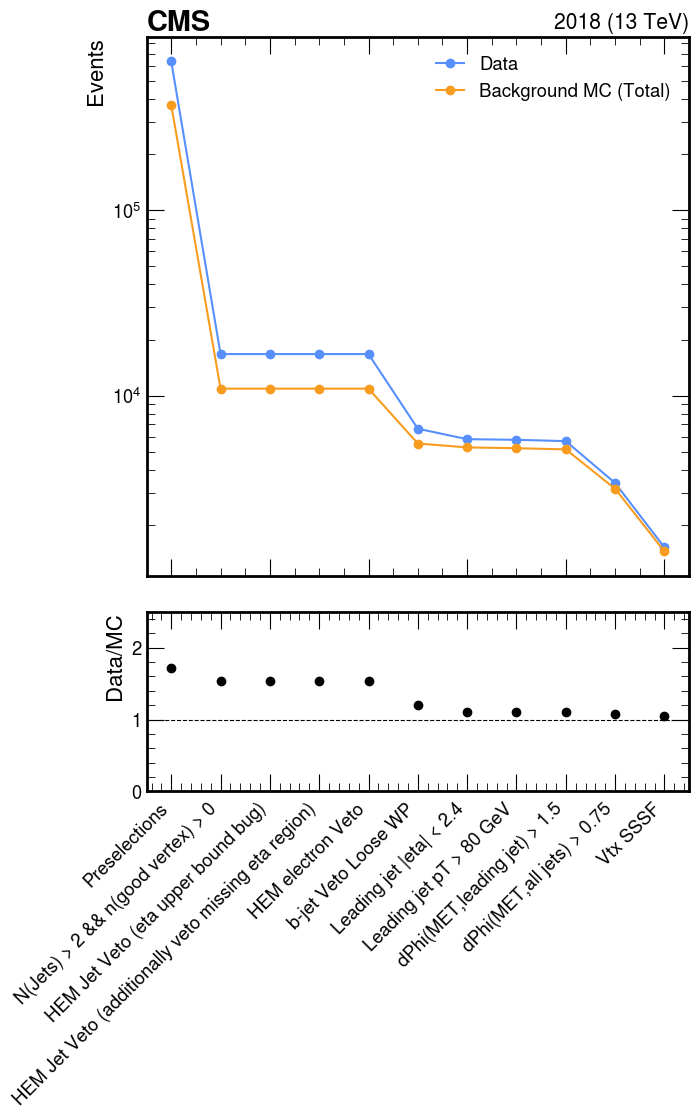

In [21]:
fig, ax = plt.subplots(figsize=(7,7))

mplhep.cms.label('', data=True, year=2018)

data_cutflow = np.array(utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total'].to_list())
bkg_cutflow = np.array(utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts').loc['Total'].to_list())

plt.plot(data_cutflow, '-o', label='Data')
plt.plot(bkg_cutflow, '-o', label='Background MC (Total)')

plt.legend()

ratio_length = (ax.get_position().y1 - ax.get_position().y0) / 3
ax_ratio = fig.add_axes([ax.get_position().x0, ax.get_position().y0 - ratio_length * 1.2, \
                         ax.get_position().x1 - ax.get_position().x0, ratio_length]) 

ax.get_shared_x_axes().join(ax, ax_ratio)
ax.xaxis.set_ticklabels([])

ax_ratio.set_xlabel(ax.get_xlabel())
ax.set_xlabel('')
ax_ratio.set_ylabel('Data/MC')
ax_ratio.set_ylim([0,2.5])

ratio = data_cutflow / bkg_cutflow
    
ax_ratio.plot(ratio, 'o', color='black')
    
ax_ratio.axhline(y=1, color='black', linestyle='--', linewidth=0.8)

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

plt.xticks(ticks = np.arange(len(data_cutflow)), labels = cuts, rotation = 45, ha = 'right')

ax.set_ylabel('Events')
ax.set_yscale('log')



### Plot the efficiency

Saved: ./plots/VR_SSSF_HEMvetos_good_vtx_v10_m0p99_PV/cutflow//Cutflow_background.png


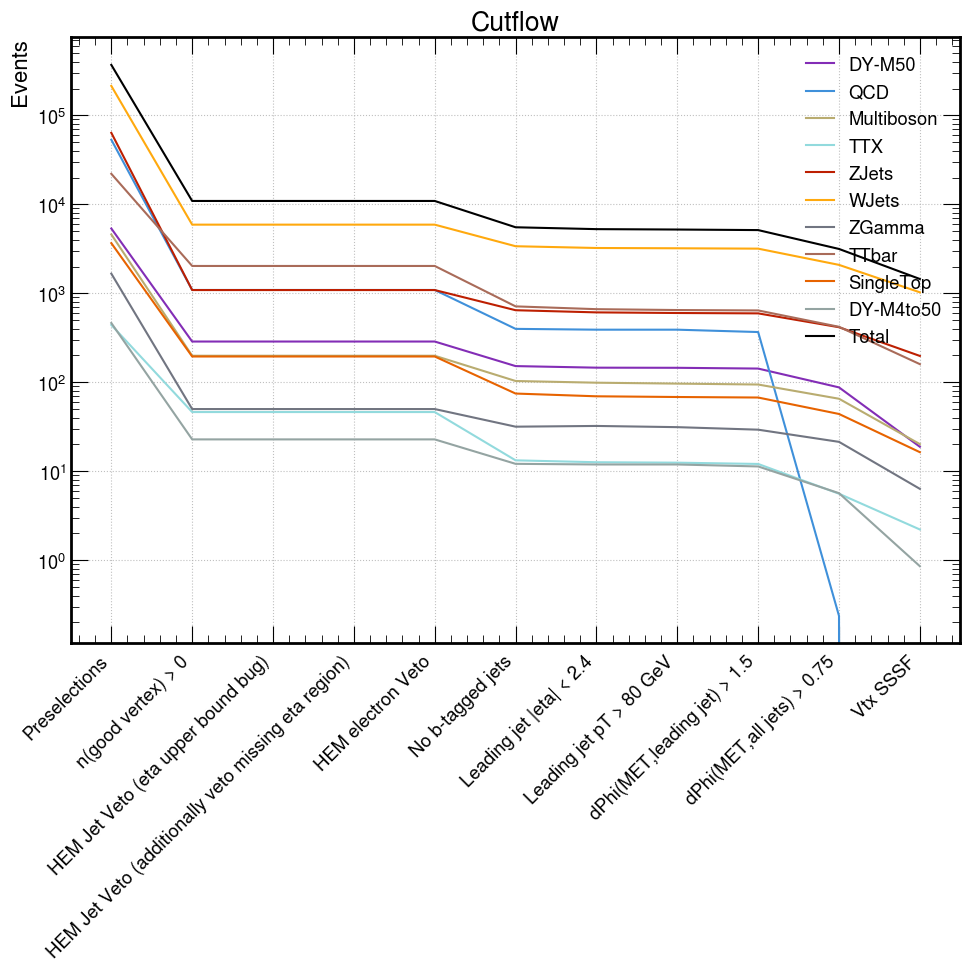

In [22]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [23]:
utils.get_data_cutflow_dict(data_histo, 'cutflow_cts').loc['Total']

Preselections                                         635,115.0
n(good vertex) > 0                                     16,783.0
HEM Jet Veto (eta upper bound bug)                     16,783.0
HEM Jet Veto (additionally veto missing eta region)    16,783.0
HEM electron Veto                                      16,783.0
No b-tagged jets                                        6,643.0
Leading jet |eta| < 2.4                                 5,834.0
Leading jet pT > 80 GeV                                 5,788.0
dPhi(MET,leading jet) > 1.5                             5,694.0
dPhi(MET,all jets) > 0.75                               3,385.0
Vtx SSSF                                                1,523.0
Name: Total, dtype: float64

In [24]:
utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

,Preselections,n(good vertex) > 0,HEM Jet Veto (eta upper bound bug),HEM Jet Veto (additionally veto missing eta region),HEM electron Veto,No b-tagged jets,Leading jet |eta| < 2.4,Leading jet pT > 80 GeV,"dPhi(MET,leading jet) > 1.5","dPhi(MET,all jets) > 0.75",Vtx SSSF
DY-M50,"5,356.0",287.0,287.0,287.0,287.0,152.0,145.9,145.4,142.5,87.6,18.8
QCD,"53,320.0","1,090.5","1,090.5","1,090.5","1,090.5",398.3,390.0,390.0,366.9,0.2,0.0
Multiboson,"4,593.9",198.7,198.7,198.7,198.7,103.3,98.8,96.6,94.3,65.2,20.2
TTX,440.9,46.2,46.2,46.2,46.2,13.2,12.6,12.5,12.1,5.6,2.2
ZJets,"63,747.4","1,088.3","1,088.3","1,088.3","1,088.3",645.5,610.4,600.6,594.9,415.6,197.7
WJets,"214,716.6","5,915.9","5,915.9","5,915.9","5,915.9","3,383.4","3,232.5","3,208.7","3,178.5","2,087.8","1,026.3"
ZGamma,"1,665.3",50.0,50.0,50.0,50.0,31.7,32.3,31.3,29.3,21.4,6.3
TTbar,"22,073.2","2,029.9","2,029.9","2,029.9","2,029.9",713.0,663.3,648.6,642.0,420.1,159.8
SingleTop,"3,665.0",194.8,194.8,194.8,194.8,74.6,69.5,68.3,67.3,44.0,16.4
DY-M4to50,463.6,22.8,22.8,22.8,22.8,12.1,11.9,11.9,11.3,5.7,0.9


Saved: ./plots/VR_SSSF_HEMvetos_good_vtx_v10_m0p99_PV/cutflow//Cutflow_background.png


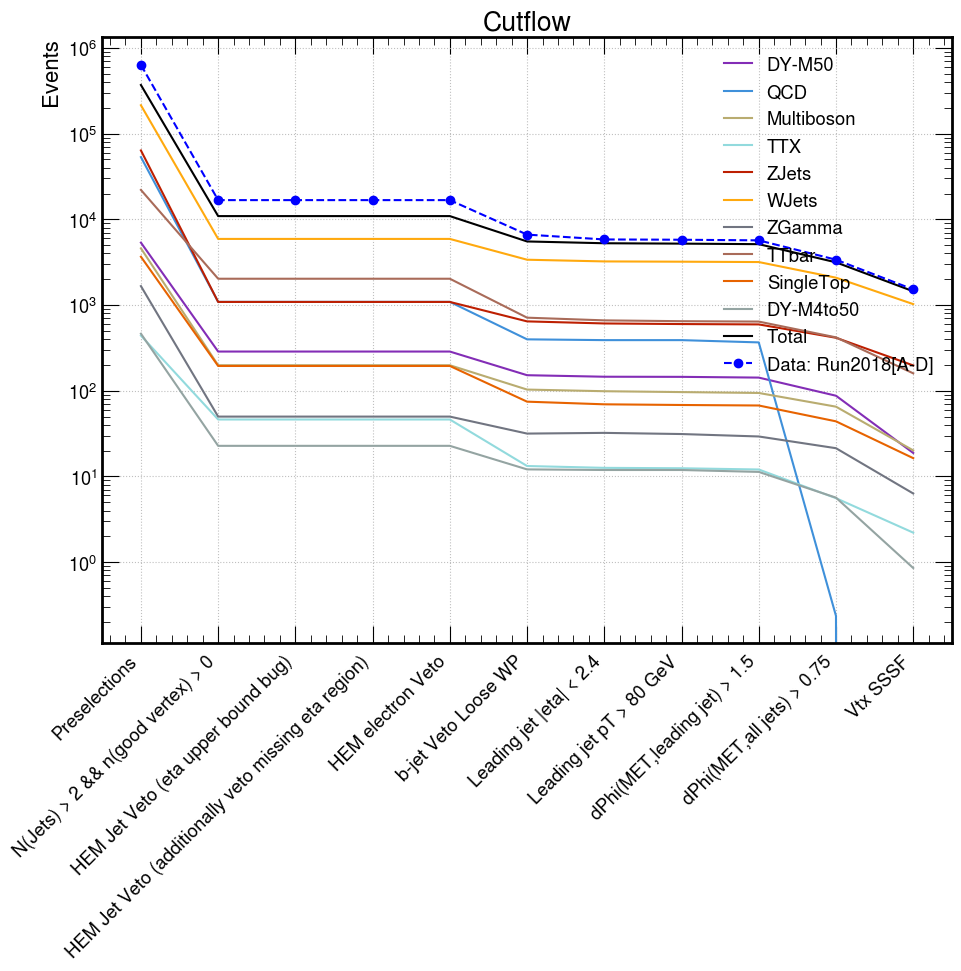

In [25]:
cmap = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"] # cms-recommended
bkg_cmap = {
    "QCD": cmap[0],
    "WJets": cmap[1],
    "ZJets": cmap[2],
    "DY-M4to50": cmap[3],
    "DY-M50": cmap[4],
    "TTbar": cmap[5],
    "SingleTop": cmap[6],
    "Multiboson": cmap[7],
    "ZGamma": cmap[8],
    "TTX": cmap[9]
}

df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
processes = df.index.values.tolist()

cuts = utils.get_bkg_list_of_cuts(bkg_histo)
cuts[1] = 'N(Jets) > 2 && n(good vertex) > 0'
cuts[5] = 'b-jet Veto Loose WP'

# Color map for each process
for process in processes:
    if 'Total' in process:
        plt.plot(cuts, df.loc[process], label=process, color='black')
    else:
        plt.plot(cuts, df.loc[process], label=process, color = bkg_cmap[process])

# plot data
df_data = utils.get_data_cutflow_dict(data_histo, 'cutflow_cts')
plt.plot(cuts, df_data.loc['Total'], label='Data: Run2018[A-D]', color = 'blue', marker='o', linestyle='--')

if plot_dict_bkg_eff['doLog']:
    plt.yscale('log')

if plot_dict_bkg_eff['ylim'] != None:
    plt.ylim(plot_dict_bkg_eff['ylim'][0], plot_dict_bkg_eff['ylim'][1])
    
plt.grid()
    
plt.ylabel(plot_dict_bkg_eff['ylabel'])
plt.title(plot_dict_bkg_eff['title'])
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')
    
plt.legend(loc='upper right')
    
if plot_dict_bkg_eff['doSave']:
    os.makedirs(plot_dict_bkg_eff['outDir'], exist_ok=True)
    plt.tight_layout()
    plt.savefig(f"{plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    print(f"Saved: {plot_dict_bkg_eff['outDir']}/{plot_dict_bkg_eff['outName']}")
    
plt.show()